In [33]:
from sklearn.datasets import fetch_openml

In [34]:
mnist = fetch_openml('mnist_784', version=1)

In [35]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [36]:
X, y = mnist['data'], mnist['target']

In [149]:
X.shape  #there are 70,000 images and ecah image has 784 features

(70000, 784)

In [38]:
y.shape

(70000,)

## let's took a peek at one digit from the dataset

In [39]:
import matplotlib as mpl

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
some_digit = np.array(X.iloc[0])

In [42]:
some_digit_image = some_digit.reshape(28, 28)

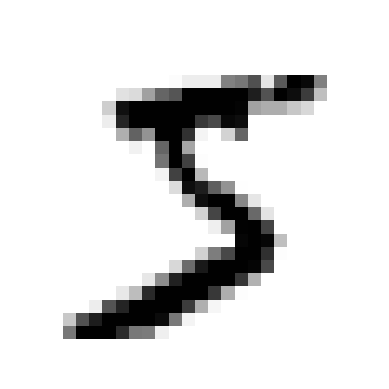

In [43]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [44]:
y[0]

'5'

In [45]:
# number 5 is in srting let's convert it to integer
y = y.astype(np.uint8)

## creating a test set

In [46]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a binary classifier

### let's create a target vector for the classification task

In [47]:
y_train_5 = (y_train == 5) # True for all 5s, false for all other digits

In [48]:
y_test_5 = (y_test == 5)

In [49]:
from sklearn.linear_model import SGDClassifier

In [50]:
sgd_clf = SGDClassifier(random_state = 42)

In [51]:
np.unique(y_train_5)

array([False,  True])

In [52]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [53]:
sgd_clf.predict([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Evaluatting using Cross-validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,
               scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

## Let's classified every single image in the "not-5" class

In [56]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [57]:
never_5_clf = Never5Classifier()

In [58]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3,
               scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [59]:
## let's make a predictions using cross_val_predict() funtion

In [60]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Confusion matrix
it is a much better way to evaluate the performance of a classifier

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [63]:
y_train_perfect_predictions = y_train_5 #pretending we reach perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision and Recall
Prescion = TP/(TP+FP)
Recall = TP/(TP+FN)

In [64]:
from sklearn.metrics import precision_score, recall_score

In [65]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [66]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

# let's compute the f1_score() function

In [67]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

let's call the decision_function() method to return a score for each instances, and then make
predictions based on those scores using any threshold

In [68]:
y_scores = sgd_clf.decision_function([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [69]:
y_scores

array([2164.22030239])

In [70]:
threshold = 0

In [71]:
y_some_digit_pred = (y_scores > threshold)

In [72]:
y_some_digit_pred

array([ True])

In [73]:
threshold = 8000

In [74]:
y_some_digit_pred = (y_scores > threshold)

In [75]:
y_some_digit_pred

array([False])

## Deciding which threshold to use
but first let's the score of all instances in the training set using cross_val_predict()funtion and specify it with decision scores instead of predictions.

In [76]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                          method='decision_function')

In [77]:
from sklearn.metrics import precision_recall_curve

In [78]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

## let's finally plot precision and recall as functions of the threshold using Matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

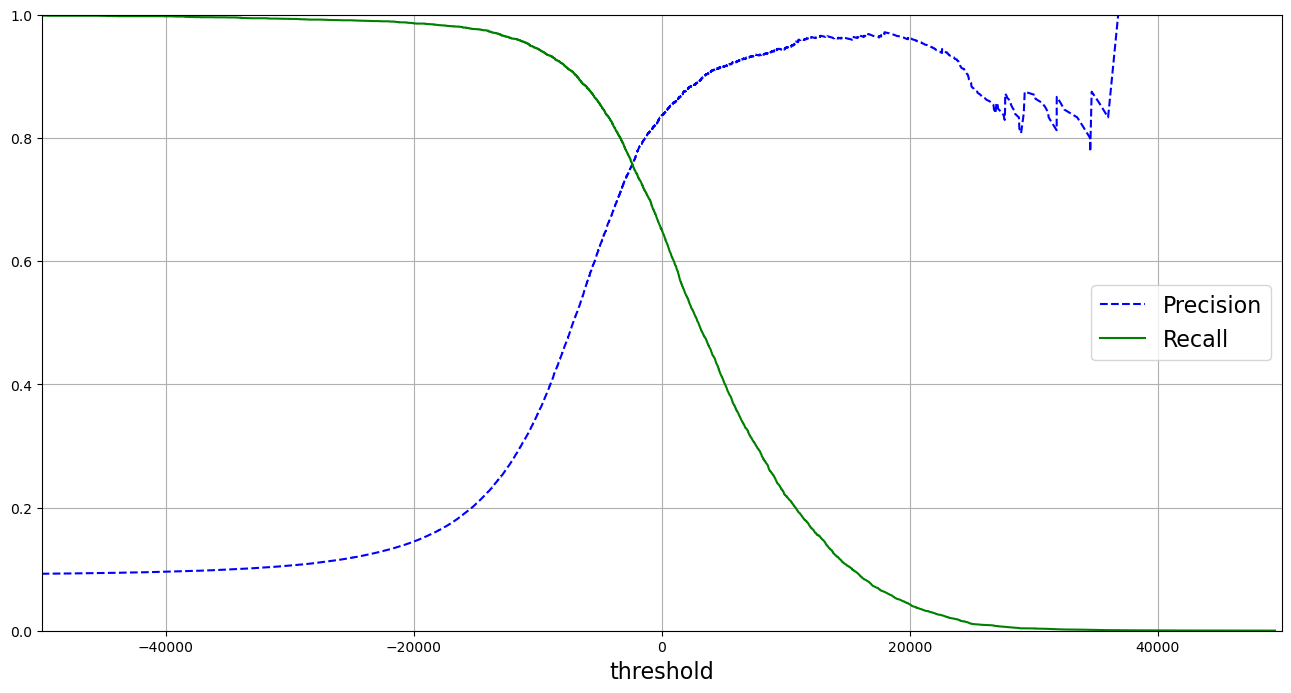

In [79]:
plt.figure(figsize=(16, 8))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('threshold', fontsize=16)
    plt.legend(loc= 'center right', fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show


## to find the threshold that will give us a 90% precision

In [80]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [81]:
threshold_90_precision

3370.0194991439557

In [82]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

## let's check these predictions' precision and recall

In [83]:
precision_score(y_train_5, y_train_pred_90 )

0.9000345901072293

In [84]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## The ROC Curve (Receiver operating characteristic)
it is another comon tool used with binary classifiers. Instead of the precision/recall, the roc curve
plots the true positive rate which is another name for recall.

We first need to compute the TPR AND FPR for various threshold values using
the roc_curve() function

In [85]:
from sklearn.metrics import roc_curve

In [86]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

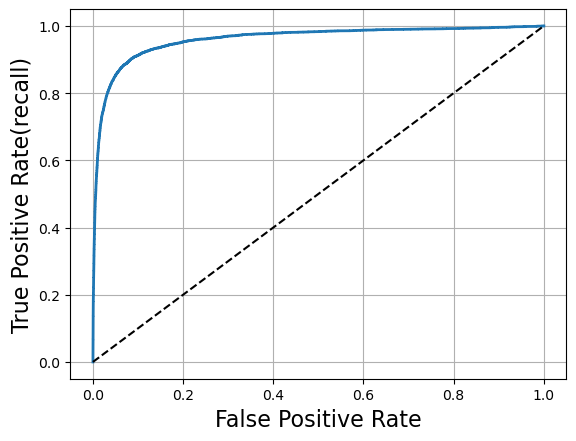

In [87]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--') #dashed diagonal
    plt.grid(True)
    plt.xlabel('False Positive Rate', size=16)
    plt.ylabel('True Positive Rate(recall)', size=16)
plot_roc_curve(fpr, tpr)
plt.show()

## Let's compute the ROC AUC, a perfect classifier will have a roc auc equal to 1 
## whereas a purely random classifier will have a roc auc equal to 0.5

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Let's train a RandomForestClassifier and compare its roc auc score to the sgdclassifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest_clf = RandomForestClassifier(random_state=42)

In [92]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [93]:
### let's find the scores in order to plot roc curve

In [94]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
fpr_forest, tpr_forest, threshollds_forest = roc_curve(y_train_5, y_scores_forest)

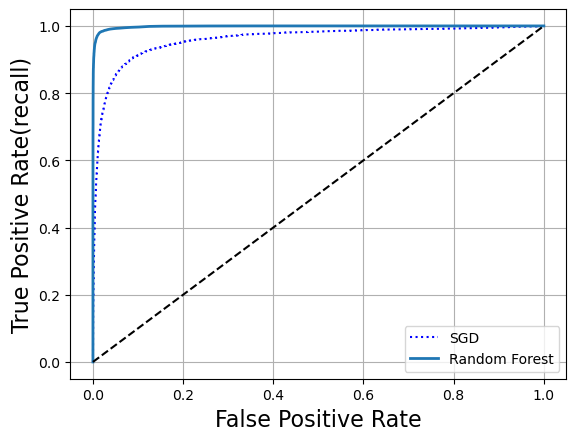

In [95]:
# let's plot the roc curves first
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [96]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [97]:
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [98]:
precision_score(y_train_5, y_train_forest_pred)

0.9905083315756169

In [99]:
recall_score(y_train_5, y_train_forest_pred)

0.8662608374838591

# Multiclass Classification

scikit-leran detects when you try to use a binary classification algorithms for a multiclass task, 
and it automatically runs OvA (except for svm classifiers for which it use ovo).
let's try with the sgdclassifier

In [100]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5


SGDClassifier(random_state=42)

In [101]:
sgd_clf.predict([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [102]:
some_digit_scores = sgd_clf.decision_function([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [103]:
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [104]:
np.argmax(some_digit_scores)

3

In [105]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [106]:
sgd_clf.classes_[5]

5

if we want to force scikitlearn to use one-versus-one or one-versus-all, 
we can use the onevsoneclassifier or onevsrestclassifier classes.
let's try it below:

In [107]:
from sklearn.multiclass import OneVsOneClassifier

In [108]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [109]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [110]:
ovo_clf.predict([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [111]:
len(ovo_clf.estimators_)

45

In [112]:
#randomforesclassifier we do not have to run ovo or ova because random forest classifiers
#can directly classify instances into multiple classes.
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
forest_clf.predict([some_digit]) 

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [114]:
# let's get the list of probabilities that the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [115]:
cross_val_score(sgd_clf, X_train, y_train, cv=3,
               scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

we can do better by scaling the inputs, increases accuracy above 89%

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [118]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [119]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,
               scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

let's assume we a have found a promising model and want to find ways to improve it.
of course if it was a real project we would've follow the steps in the machine learning checklist like exploring data preparation options, trying different models, shortlisting the best one and fine-tuning their hyperparameters using gridsearchcv and automating as much as possible.

# Error Analysis

In [120]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [121]:
conf_mx = confusion_matrix(y_train,y_train_pred )

In [122]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

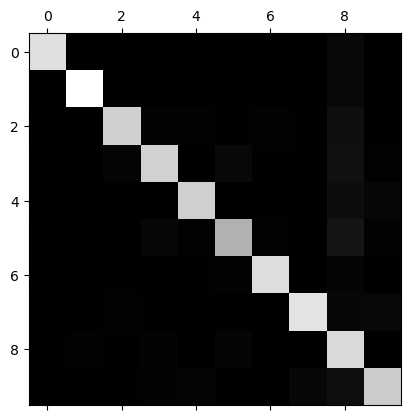

In [123]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## let's check if there are fewer images of 5s in the dataset or that the classifier does not 
## perform as well on 5s on other digits.

In [124]:
# first we need to divide each value in the confusion matrix by the number of images in the
# corresponding class
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

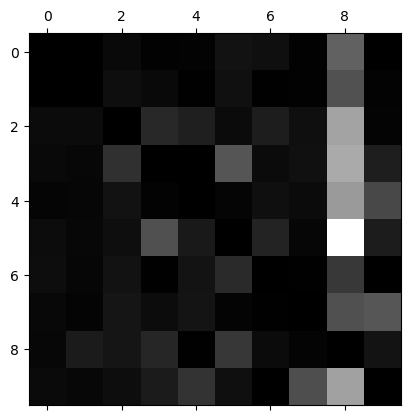

In [125]:
# let's fill the mainly diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1 )
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [136]:
knn_clf.predict([some_digit])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [137]:
# let's compute the f1 score for each individual label
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [139]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [140]:
f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9778357403921755

# Multioutput Classification

In [143]:
# let's add noise to their pixel intemsities using Numpy's randint()
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train = noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [144]:
# after adding a noisy's image now let's train the classifier and make it clean the image
knn_clf.fit(X_train, y_train_mod)

KNeighborsClassifier()

In [147]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])

NameError: name 'some_index' is not defined